In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading Dataset

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Preprocessing

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# fill the missing values using numerical terms -- mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [7]:
# fill the missing values for categorical terms -- mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [8]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Create New Attributes

In [9]:
# Total Income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


# Exploratory Data Analysis

<Axes: xlabel='Gender', ylabel='count'>

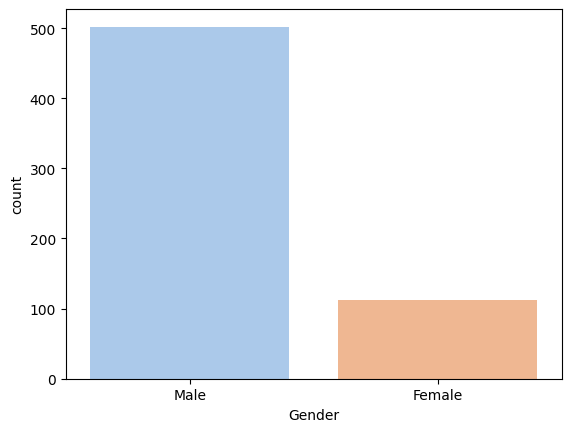

In [10]:
# Categorical Attributes Visualization
sns.countplot(x ='Gender',data=df, palette = 'pastel', hue='Gender')

<Axes: xlabel='Married', ylabel='count'>

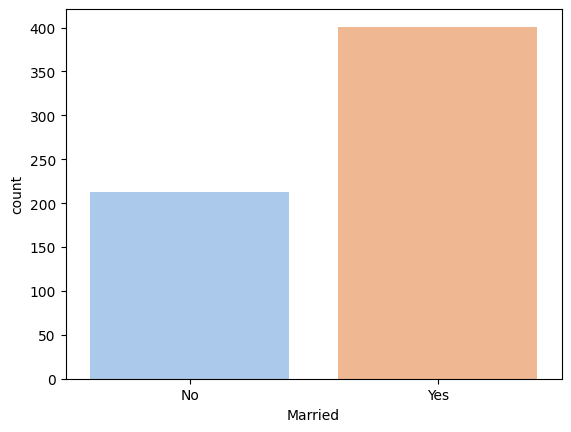

In [11]:
sns.countplot(x ='Married',data=df, palette = 'pastel', hue='Married')

<Axes: xlabel='Dependents', ylabel='count'>

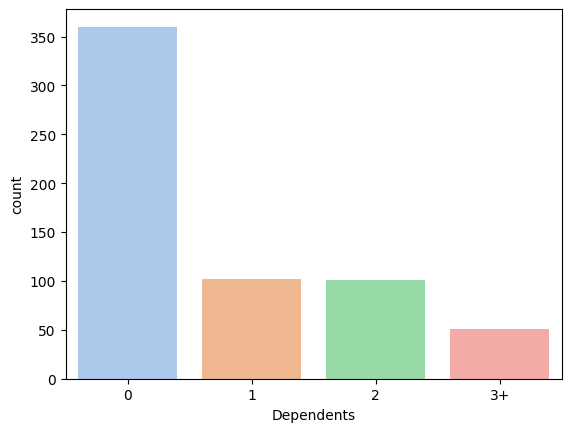

In [12]:
sns.countplot(x ='Dependents',data=df, palette = 'pastel', hue='Dependents')

<Axes: xlabel='Education', ylabel='count'>

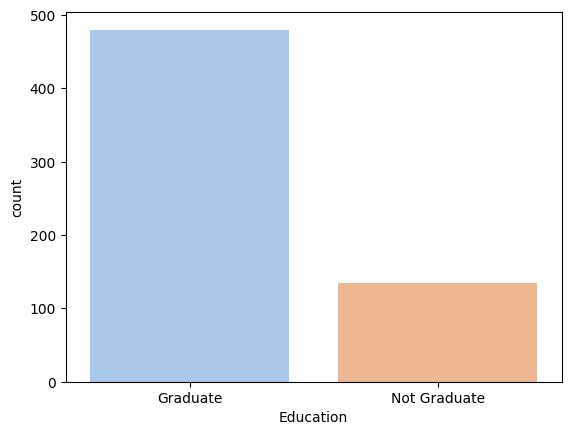

In [13]:
sns.countplot(x ='Education',data=df, palette = 'pastel', hue='Education')

<Axes: xlabel='Self_Employed', ylabel='count'>

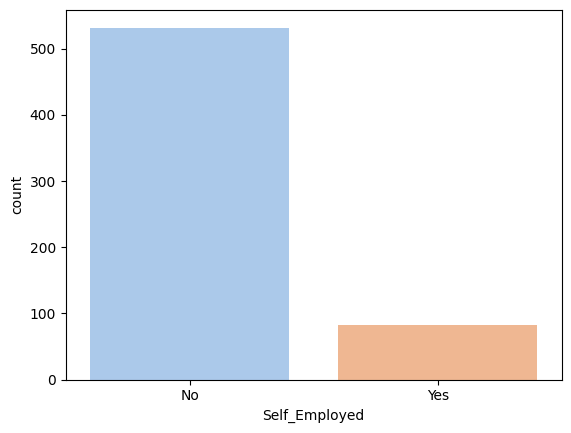

In [14]:
sns.countplot(x ='Self_Employed',data=df, palette = 'pastel', hue='Self_Employed')

<Axes: xlabel='Property_Area', ylabel='count'>

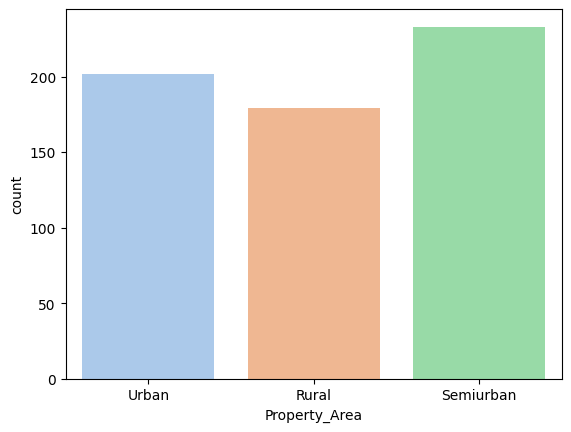

In [15]:
sns.countplot(x ='Property_Area',data=df, palette = 'pastel', hue='Property_Area')

<Axes: xlabel='Loan_Status', ylabel='count'>

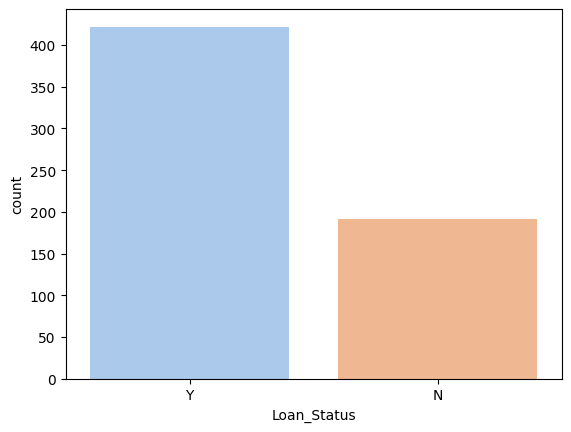

In [16]:
sns.countplot(x ='Loan_Status',data=df, palette = 'pastel', hue='Loan_Status')

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

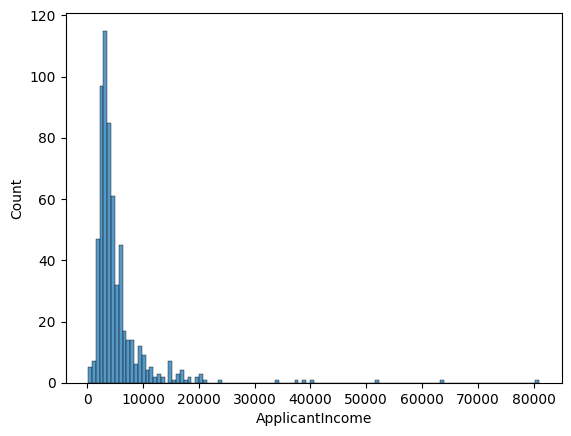

In [17]:
# Numerical Attributes Visualization
sns.histplot(df['ApplicantIncome'])

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

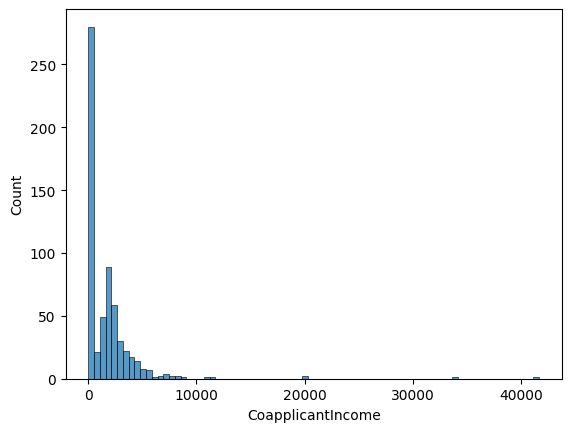

In [18]:
sns.histplot(df['CoapplicantIncome'])

<Axes: xlabel='LoanAmount', ylabel='Count'>

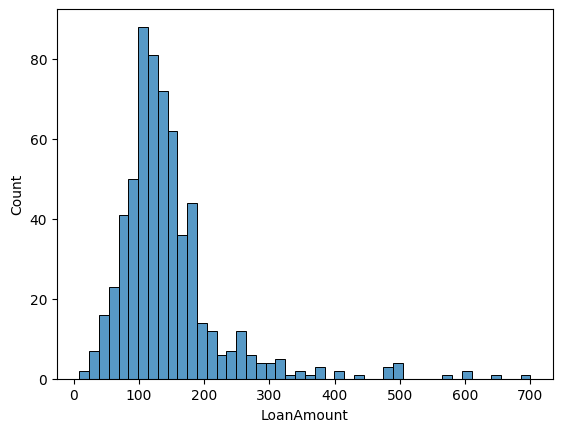

In [19]:
sns.histplot(df['LoanAmount'])

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

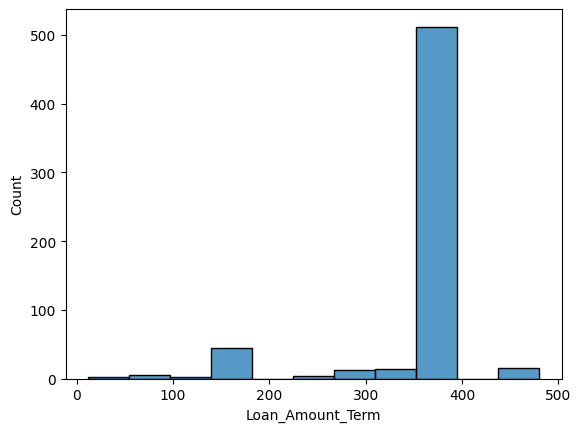

In [20]:
sns.histplot(df['Loan_Amount_Term'])

<Axes: xlabel='Credit_History', ylabel='Count'>

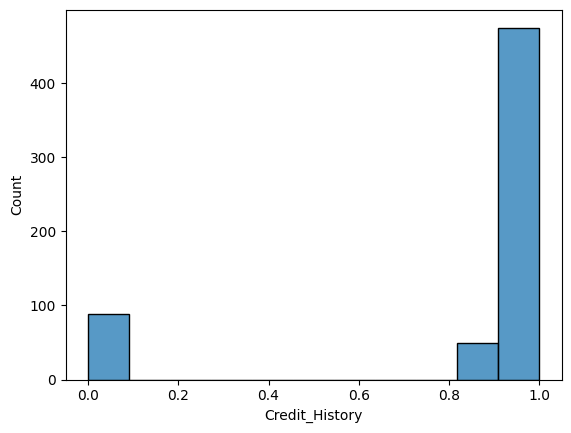

In [21]:
sns.histplot(df['Credit_History'])

# Apply Log Transformation to the Attribute

<Axes: xlabel='ApplicantIncomeLog', ylabel='Count'>

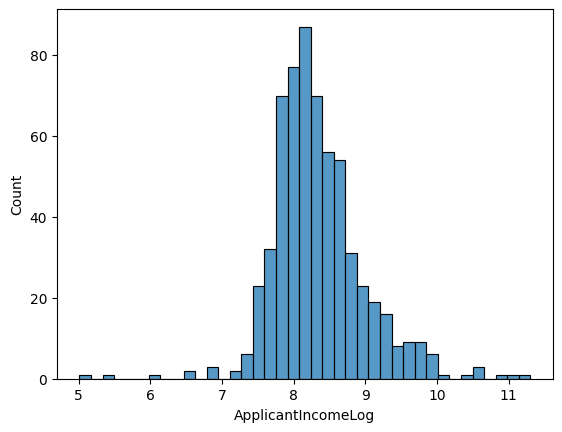

In [22]:
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])
sns.histplot(df['ApplicantIncomeLog'])

C:\Users\Ashima\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='CoapplicantIncomeLog', ylabel='Count'>

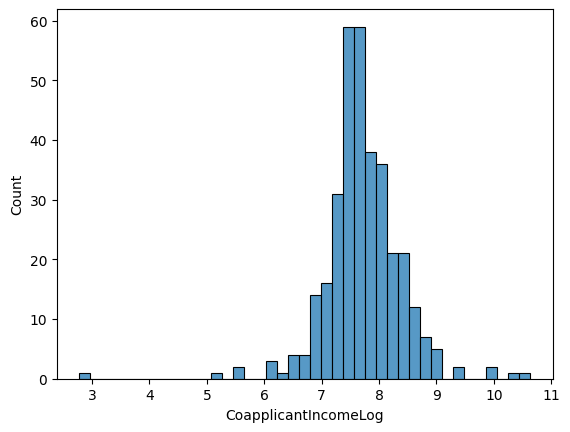

In [23]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome'])
sns.histplot(df['CoapplicantIncomeLog'])

<Axes: xlabel='LoanAmountLog', ylabel='Count'>

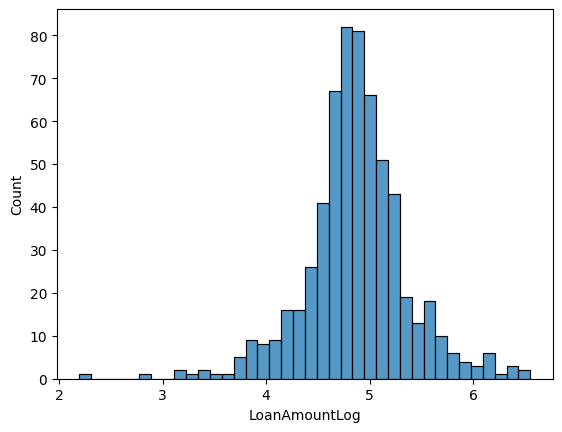

In [24]:
df['LoanAmountLog'] = np.log(df['LoanAmount'])
sns.histplot(df['LoanAmountLog'])

<Axes: xlabel='Loan_Amount_Term_Log', ylabel='Count'>

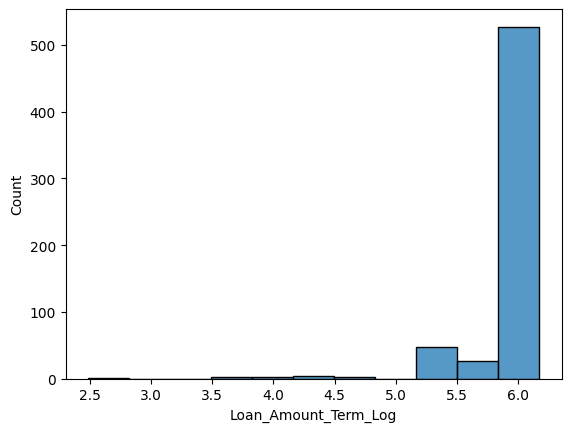

In [25]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'])
sns.histplot(df['Loan_Amount_Term_Log'])

<Axes: xlabel='Total_Income_Log', ylabel='Count'>

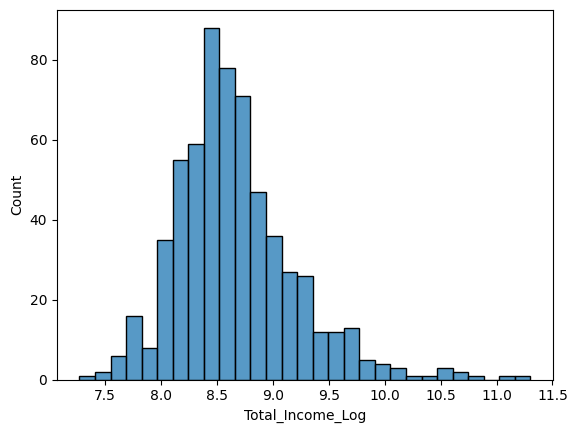

In [26]:
df['Total_Income_Log'] = np.log(df['Total_Income'])
sns.histplot(df['Total_Income_Log'])

# Correlation Matrix

<Axes: >

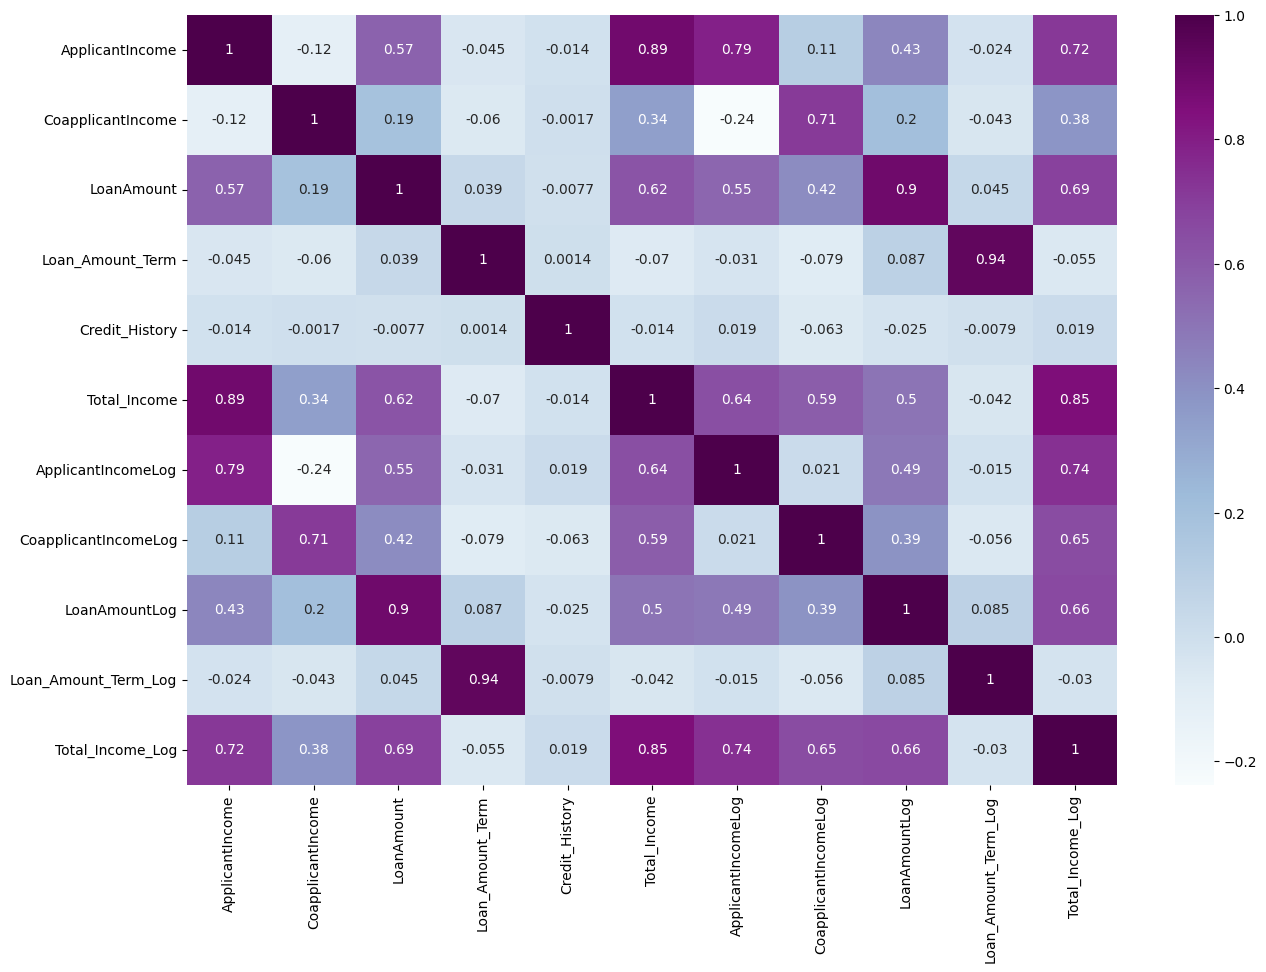

In [27]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='BuPu')

In [28]:
# Dropping Unnecessary Columns
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income', 'Loan_ID', 'CoapplicantIncomeLog']
df = df.drop(columns = cols, axis = 1)

In [29]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104,8.699515


# Label Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender', 'Married','Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])

In [31]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674026,4.986426,5.886104,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,5.886104,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,4.189655,5.886104,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,4.787492,5.886104,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,4.948760,5.886104,8.699515


# Train-Test Split

In [32]:
X = df.drop(columns = ['Loan_Status'], axis=1)
y = df['Loan_Status']

In [33]:
from sklearn.model_selection import train_test_split, cross_val_score

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Model Training

In [35]:
def classify(model, x, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(X_train, y_train)
    print("Accuracy is: ", model.score(X_test, y_test)*100)
    # Cross Validation
    score = cross_val_score(model, X, y, cv=5)
    print("Cross Validation is: ", np.mean(score)*100)

In [36]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is:  77.27272727272727
Cross Validation is:  80.9462881514061


In [38]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is:  73.37662337662337
Cross Validation is:  71.82726909236305


In [39]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is:  76.62337662337663
Cross Validation is:  78.99240303878449


In [40]:
model = ExtraTreesClassifier()
classify(model,X,y)

Accuracy is:  73.37662337662337
Cross Validation is:  77.36505397840864


# Hyperparameter Tuning

In [41]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model, X, y)

Accuracy is:  77.27272727272727
Cross Validation is:  80.45715047314408


# Confusion Matrix

In [42]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [44]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[24, 30],
       [ 5, 95]], dtype=int64)

<Axes: >

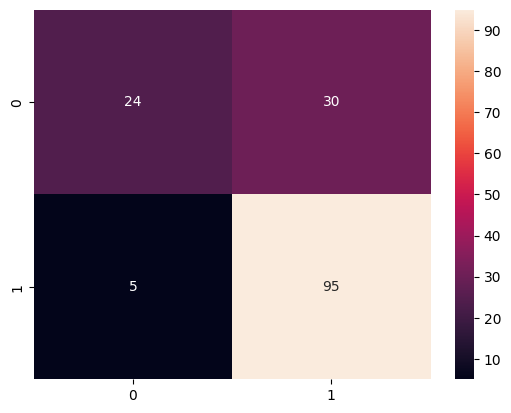

In [45]:
sns.heatmap(cm, annot=True)